Format — All patient medical images are saved in the __DICOM__ file format. This format has PHI (protected health information) about the patient such as — name, sex, age in addition to other image related data such as equipment used to capture the image and some context to the medical treatment. Medical Imaging Equipments create DICOM files. 

In [162]:
import pydicom # dicom handler package
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage
import os
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [18]:
# Populating file list data
input_root = 'D:\TestData_LungCancer\CPTAC-LUAD'

def load_scan(path):
    file_list = []
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if ".dcm" in filename.lower():
                file_list.append(os.path.join(dirName,filename))
    return file_list

In [160]:
%%time
#Perform scan
files = load_scan(input_root)
small_list = files[0:500]
working_files = files # for now this will be used as a swtich between big/small data set

Wall time: 53 ms


In [155]:
#Reference file, we expect everything in the same size az this
RefDs = pydicom.read_file(files[0])

ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(working_files))
ConstPixelSpacing = (float(RefDs.ImagerPixelSpacing[0]),float(RefDs.ImagerPixelSpacing[1]))
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])

data = RefDs.pixel_array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))

data_downsampling = data[::8, ::8]
print('The downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

The image has 2372 x 3000 voxels
The downsampled image has 297 x 375 voxels


In [150]:
%%time
def extract_pixel_spacing(files, outputFilename = 'PixelSpacing_ForTestData.csv'):
    size_data = {'x':[],'y':[]}
    for filenameDCM in files:
        # read the file
        ds = pydicom.read_file(filenameDCM, stop_before_pixels=True)
        try:
            size_data['x'].append(ds.ImagerPixelSpacing[0])
            size_data['y'].append(ds.ImagerPixelSpacing[1])
        except Exception as e:
            size_data['x'].append(ds.PixelSpacing[0])
            size_data['y'].append(ds.PixelSpacing[1])
    pd.DataFrame(size_data).to_csv(outputFilename)
    
extract_pixel_spacing(small_list, 'smallList_Spacing.csv')

def resize_dicom_image(dicom_image, size = 64):
    '''
    This function is used to resize a given dicom image, the returned value is the the resized byte array
    '''
    result =cv2.resize(dicom_image.pixel_array, dsize=(size, size), interpolation= cv2.INTER_CUBIC)
    return result


def preprocess_files(files):
    


Wall time: 1.58 s


In [151]:
%%time
spacing_Data = pd.read_csv('smallList_Spacing.csv')
print('Spacing Data results:\n')
print('min : {0} | avg : {1} | max {2}\t'.format(spacing_Data.x.min(), spacing_Data.x.mean(),spacing_Data.x.max()))

Spacing Data results:

min : 0.14400000000000002 | avg : 0.7272122459999998 | max 1.0156	
Wall time: 5.02 ms


In [128]:
spacing_Data.x.max()

5.46875

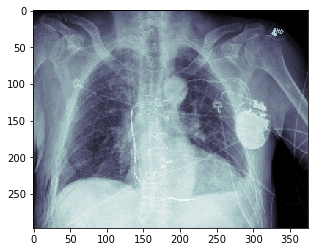

In [159]:
plt.imshow(data_downsampling, cmap=plt.cm.bone) 

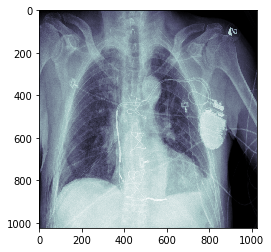

In [218]:
img = RefDs.pixel_array

plt.imshow(resize_dicom_image(RefDs, size = 1024), cmap = plt.cm.bone)

In [213]:
resize_dicom_image(RefDs, size = 64).shape

(64, 64)

In [208]:
resize_dicom_image(RefDs, size = 280).shape

(280, 280)

In [217]:
RefDs.pixel_array.shape

(2372, 3000)